In [1]:
import math
from datetime import datetime
import json
from pymongo import MongoClient
import dbQueries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import Counter
sns.set()

In [2]:
plt.style.use('seaborn-notebook')


In [3]:
# Display results per genre
re_json = dbQueries.getTopGenres(10)
df_topGenres = pd.DataFrame.from_dict(re_json)
# ======= Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
0,Drama,81.121,1169,11.676,8.638,1574308.010,3.377920e+07,4.037743e+07,7.649464e+07,3911999.482
1,Documentary,110.208,1054,2.223,9.383,4910.930,2.550000e+07,3.190621e+07,6.845040e+07,22916.507
2,Comedy,67.746,760,17.191,8.658,2337151.226,3.714242e+07,4.488247e+07,8.158763e+07,4024125.428
3,Music,70.907,529,6.365,9.453,549995.849,5.050000e+07,3.263855e+07,6.939632e+07,1135669.070
4,Romance,88.394,325,13.211,8.599,830369.923,2.663846e+07,3.491543e+07,6.057785e+07,2699984.206


In [4]:
df_topGenres.shape

(19, 10)

In [5]:
df_topGenres.describe()

,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
count,19.000000,19.000000,19.000000,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,72.028737,336.789474,21.365105,8.658053,3.074486e+06,4.815371e+07,4.089619e+07,8.194858e+07,6.311784e+06
std,14.046221,321.890178,13.407073,0.333461,2.954739e+06,2.122812e+07,1.302517e+07,3.063214e+07,5.965459e+06
min,45.034000,16.000000,2.223000,8.115000,2.427419e+03,2.361538e+07,1.042641e+07,1.042641e+07,0.000000e+00
25%,64.678000,155.000000,10.970500,8.476500,1.007735e+06,3.146963e+07,3.390166e+07,6.822466e+07,2.387602e+06
50%,70.864000,237.000000,17.191000,8.615000,2.163278e+06,4.345455e+07,3.875985e+07,7.354378e+07,4.024125e+06
75%,78.612000,321.000000,31.890000,8.696000,4.900723e+06,6.271667e+07,4.855728e+07,9.269073e+07,9.176454e+06
max,110.208000,1169.000000,49.639000,9.453000,9.799496e+06,1.000000e+08,6.924933e+07,1.562374e+08,1.920256e+07


In [6]:
# Checking for null values
df_topGenres.isnull().sum()

genres                 0
avgRuntime             0
noMovies               0
avgPopularity          0
avgVotes               0
avgBudget              0
avgProductionBudget    0
avgDomesticBudget      0
avgWorldwideGross      0
avgRevenue             0
dtype: int64

In [7]:
# Checking for duplications
sum(df_topGenres.duplicated())
#df.drop_duplicates(inplace=True)


0

In [8]:
# avgBudget and avgRevenue
# Replace the value of '0' to NaN
df_topGenres[['avgBudget','avgRevenue']] = df_topGenres[['avgBudget','avgRevenue']].replace(0,np.NAN)
# ======== Do the same with new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topGenres.shape[0]))

After cleaning, we have 18 rows


In [9]:
# Profits of each movie
# ======== Do the same with new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres['avgProfit'] = df_topGenres['avgRevenue']-df_topGenres['avgBudget']
df_topGenres['avgProfit'] = df_topGenres['avgProfit'].apply(np.int64)
df_topGenres['avgBudget'] = df_topGenres['avgBudget'].apply(np.int64)
df_topGenres['avgRevenue'] = df_topGenres['avgRevenue'].apply(np.int64)
df_topGenres['avgRuntime'] = df_topGenres['avgRuntime'].apply(np.int64)
df_topGenres['avgVotes'] = df_topGenres['avgVotes'].apply(np.int64)

df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3.377920e+07,4.037743e+07,7.649464e+07,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,2.550000e+07,3.190621e+07,6.845040e+07,22916,18005
2,Comedy,67,760,17.191,8,2337151,3.714242e+07,4.488247e+07,8.158763e+07,4024125,1686974
3,Music,70,529,6.365,9,549995,5.050000e+07,3.263855e+07,6.939632e+07,1135669,585673
4,Romance,88,325,13.211,8,830369,2.663846e+07,3.491543e+07,6.057785e+07,2699984,1869614


In [10]:
df_topGenres.dtypes

genres                  object
avgRuntime               int64
noMovies                 int64
avgPopularity          float64
avgVotes                 int64
avgBudget                int64
avgProductionBudget    float64
avgDomesticBudget      float64
avgWorldwideGross      float64
avgRevenue               int64
avgProfit                int64
dtype: object

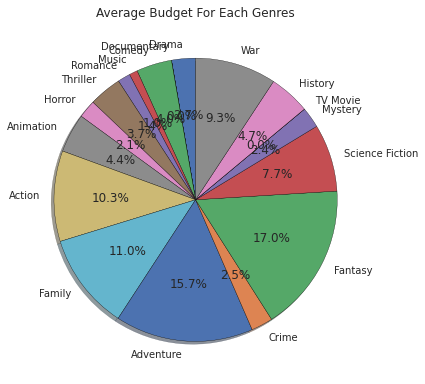

In [11]:
# ======== Plot new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
slices = df_topGenres['avgBudget']
labels = df_topGenres['genres']

plt.pie(slices, labels = labels,shadow= True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})

plt.title('Average Budget For Each Genres')
plt.tight_layout()
plt.show()

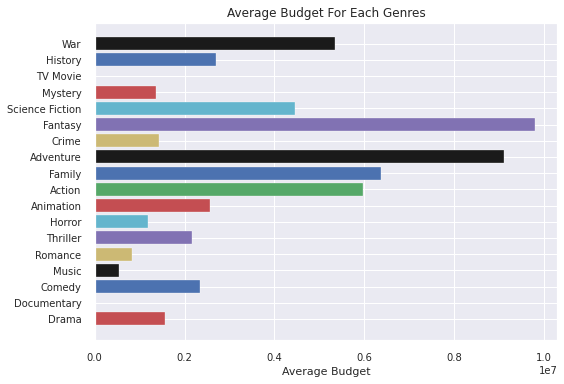

In [12]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
my_colors = 'rgbkymc'
genres = df_topGenres['genres']
avgBudget = df_topGenres['avgBudget']
plt.barh(genres, avgBudget, color= my_colors)

plt.title("Average Budget For Each Genres")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

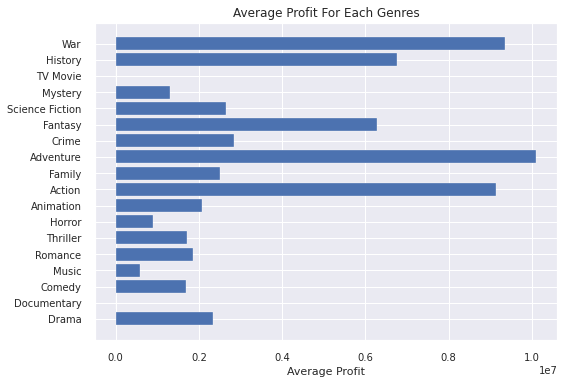

In [13]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
genres = df_topGenres['genres']
avgProfit = df_topGenres['avgProfit']
plt.barh(genres, avgProfit)

plt.title("Average Profit For Each Genres")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [14]:
# Display results per production companies
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
re_json = dbQueries.getTopProductionCompanies(10)
df_topCompanies = pd.DataFrame.from_dict(re_json)
df_topCompanies.head(5)

,production_companies,noMovies,avgPopularity,avgVotesNo,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgVotes
0,Universal Pictures,25,52.762,1441.080,2.272000e+07,61400000.0,92396685.9,177364756.8,6.497059e+07,7.448
1,BBC,24,1.944,17.417,1.458333e+06,35000000.0,19389454.0,33422485.0,0.000000e+00,8.571
2,ARTE,22,3.155,70.273,8.540597e+05,12500000.0,4157491.0,45557491.0,1.820788e+06,8.795
3,Canal+,18,10.390,183.278,2.009167e+06,12500000.0,4157491.0,45557491.0,2.024542e+07,7.739
4,Walt Disney Pictures,15,164.935,1476.267,5.826667e+07,94000000.0,41070064.8,75273052.8,3.746845e+07,7.460


In [15]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topCompanies[['avgBudget','avgRevenue']] = df_topCompanies[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topCompanies.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topCompanies.shape[0]))


After cleaning, we have 6 rows


In [16]:
# Profits of each movie
df_topCompanies['avgProfit'] = df_topCompanies['avgRevenue']-df_topCompanies['avgBudget']
df_topCompanies['avgProfit'] = df_topCompanies['avgProfit'].apply(np.int64)
df_topCompanies['avgBudget'] = df_topCompanies['avgBudget'].apply(np.int64)
df_topCompanies['avgRevenue'] = df_topCompanies['avgRevenue'].apply(np.int64)
df_topCompanies['avgVotes'] = df_topCompanies['avgVotes'].apply(np.int64)

df_topGenres.head()

,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3.377920e+07,4.037743e+07,7.649464e+07,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,2.550000e+07,3.190621e+07,6.845040e+07,22916,18005
2,Comedy,67,760,17.191,8,2337151,3.714242e+07,4.488247e+07,8.158763e+07,4024125,1686974
3,Music,70,529,6.365,9,549995,5.050000e+07,3.263855e+07,6.939632e+07,1135669,585673
4,Romance,88,325,13.211,8,830369,2.663846e+07,3.491543e+07,6.057785e+07,2699984,1869614


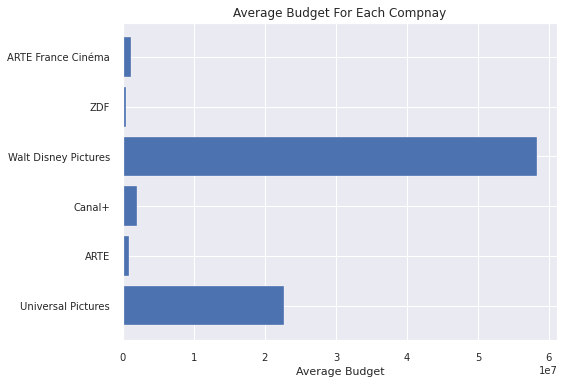

In [17]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
company = df_topCompanies['production_companies']
avgBudget = df_topCompanies['avgBudget']
plt.barh(company, avgBudget)           #Important changing

#plt.xscale('log')
plt.title("Average Budget For Each Compnay")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

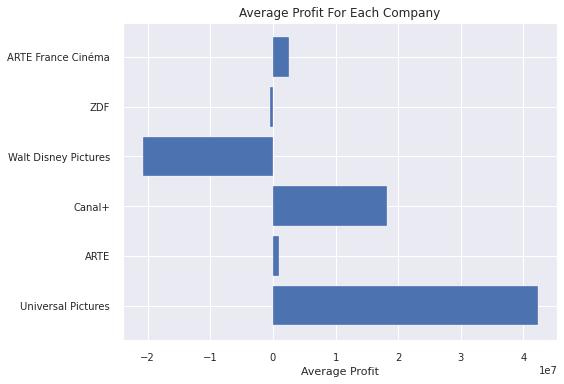

In [18]:
companies = df_topCompanies['production_companies']
avgProfit = df_topCompanies['avgProfit']
plt.barh(companies, avgProfit)

plt.title("Average Profit For Each Company")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [19]:
# Display results per vote average
re_json = dbQueries.getTopVoteAvg(10)
df_topVoted = pd.DataFrame.from_dict(re_json)
df_topVoted.head(5)

IndexError: list index out of range

In [ ]:
# Display results per revenue
re_json = dbQueries.getTopMoreRevenue(10)
df_topMoreRevenue = pd.DataFrame.from_dict(re_json)
df_topMoreRevenue.head(5)

# Analysis On Whole Data Set
## Fetching Data From MongoDB (Movies_collection)





In [ ]:
re_json = dbQueries.wholeData()
wholeData = pd.DataFrame.from_dict(re_json)
wholeData.head(5)

## Number of Rows and Columns Before Data Cleaning





In [ ]:
wholeData.shape

In [ ]:
wholeData.columns

In [ ]:
wholeData.isnull().sum()


# Data Cleaning:

In [ ]:

# Changing Data Type of Release Date Into Datetime:

wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['release_date'].head()

In [ ]:

# Budget and Revenue
# Replacing'0' by NaN

wholeData[['budget','revenue']] = wholeData[['budget','revenue']].replace(0,np.NAN)

wholeData.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(wholeData.shape[0]))

In [ ]:
# Data Imputation
# Profits of each movie

wholeData['profit'] = wholeData['revenue']-wholeData['budget']
wholeData['profit'] = wholeData['profit'].apply(np.int64)
wholeData['budget'] = wholeData['budget'].apply(np.int64)
wholeData['revenue'] = wholeData['revenue'].apply(np.int64)


# Data Analysis

In [ ]:
wholeData.dtypes


In [ ]:
wholeData.describe()

In [ ]:
 # Select the lowest and hisghest value from a given column 

def find_min_max(col_name):
    min_index = wholeData[col_name].idxmin()
    max_index = wholeData[col_name].idxmax()
    low  = pd.DataFrame(wholeData.loc[min_index,:])
    high = pd.DataFrame(wholeData.loc[max_index,:])    
    print('Movie which has highest '+col_name+' : ', wholeData['title'][max_index])
    print('Movie which has lowest '+col_name+' : ', wholeData['title'][min_index])
    return pd.concat([high,low], axis=1)

In [ ]:
# Finding the top 10 from a given column 

def top_10(col_name,size=10):
    df_sorted = pd.DataFrame(wholeData[col_name].sort_values(ascending=False))[:size]
    df_sorted['title'] = wholeData['title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(wholeData[col_name])   
    sns.barplot(x=col_name, y='title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()


In [ ]:
find_min_max('profit')


In [ ]:
top_10('profit')


In [ ]:
find_min_max('budget')


In [ ]:
top_10('budget')


In [ ]:
find_min_max('revenue')


In [ ]:
top_10('revenue')


In [ ]:
find_min_max('runtime')


In [ ]:
top_10('runtime')


In [ ]:
top_10('popularity', size=30)


In [ ]:
top_10('vote_count', size=30)


In [ ]:
df_month = wholeData.copy()
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1)
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2)
sum_month = df_month.groupby('release_month')['profit'].sum()

sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month')


In [ ]:
df_related = wholeData[['profit','budget','revenue','runtime', 'vote_count','popularity']]


In [ ]:
sns.pairplot(df_related, kind='reg')
#plt.savefig('correlation.png',bbox_inches='tight')



In [ ]:
sns.regplot(x=wholeData['revenue'], y=wholeData['budget'],color='c')


In [ ]:

def plot_correlation_map( wholeData ):
    corr = wholeData.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

In [ ]:
plot_correlation_map(wholeData[['popularity','budget','revenue','runtime','vote_count']])


In [ ]:
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    wholeData[col_name] = wholeData[col_name].map(str).map(str.strip)
    data = wholeData[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))


In [ ]:
split_count_data('genres')
